<center><h1>Naive Bayes Classifier</h1></center>

## Imports

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Constants

In [175]:
FILE_NAME = 'data.csv'

## Preprocessing

### Reading the file

In [176]:
df = pd.read_csv(FILE_NAME)
df.head()

C:\Users\imade\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [177]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


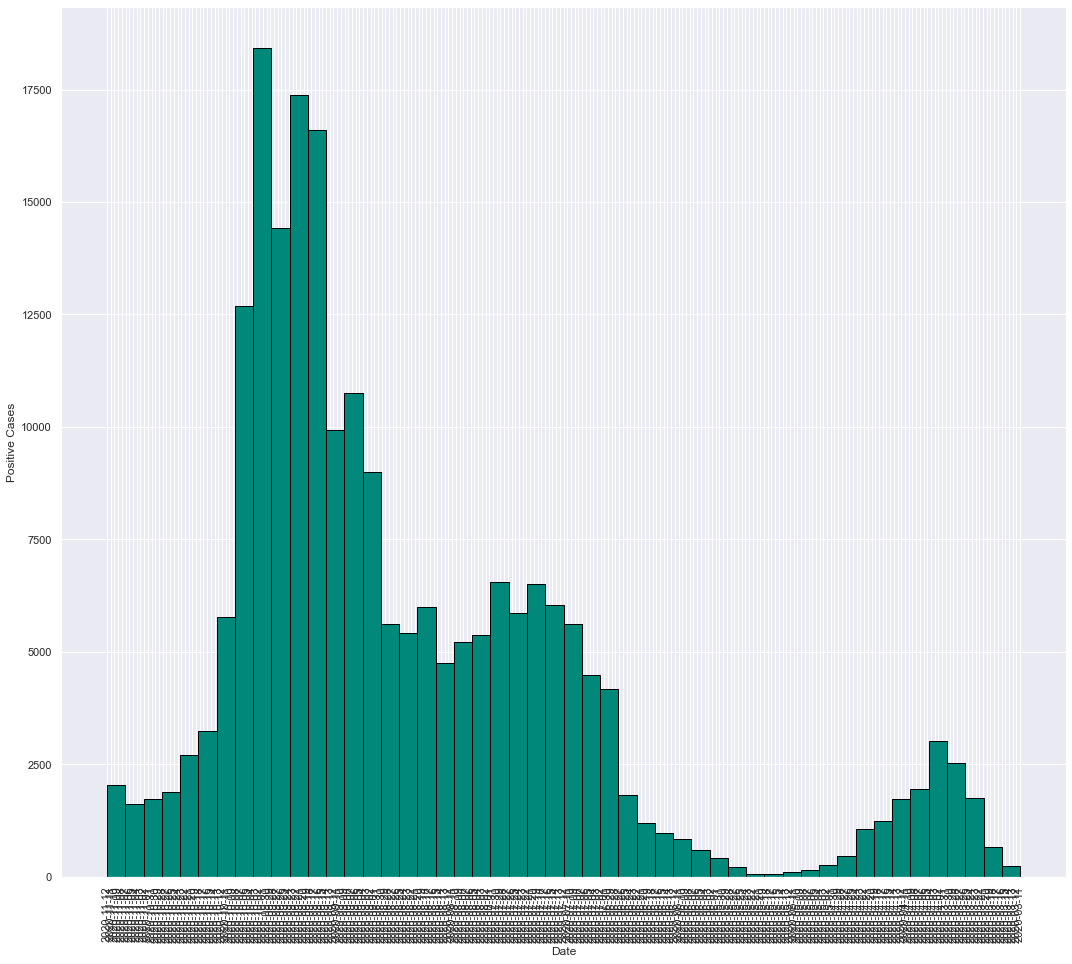

In [178]:
plt.figure(figsize=(18,16))
plt.hist(df[df['corona_result'] == 'positive']['test_date'], bins=50, ec="black", color="#00897b")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Positive Cases")
plt.show()

### Dropping Irrelevant Columns

In [179]:
df.drop('test_date', inplace=True, axis=1)
df.drop('age_60_and_above', inplace=True, axis=1)
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,negative,male,Other
1,0,1,0,0,0,negative,male,Other
2,0,0,0,0,0,negative,female,Other
3,0,0,0,0,0,negative,male,Other
4,0,1,0,0,0,negative,male,Contact with confirmed
5,1,0,0,0,0,negative,male,Other
6,1,1,0,0,0,negative,male,Other
7,0,0,0,0,0,negative,female,Contact with confirmed
8,0,0,0,0,0,negative,male,Other
9,1,1,0,0,0,negative,male,Other


### Dropping null Rows

In [180]:
df.shape

(2742596, 8)

In [181]:
df.isnull().sum()

cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
gender                 92886
test_indication            0
dtype: int64

In [182]:
df.dropna(inplace=True)

In [183]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
gender                 0
test_indication        0
dtype: int64

### Cleaning the Data

In [184]:
df.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
corona_result          3
gender                 2
test_indication        3
dtype: int64

In [185]:
for col in df:
    print(col, ': ', df[col].unique())

cough :  [0 1]
fever :  [0 1]
sore_throat :  [0 1]
shortness_of_breath :  [0 1]
head_ache :  [0 1]
corona_result :  ['negative' 'positive' 'other']
gender :  ['male' 'female']
test_indication :  ['Other' 'Contact with confirmed' 'Abroad']


#### Removing Rows with "Other" as Corona Result

In [186]:
df = df[df.corona_result != 'other']
df['corona_result'].value_counts()

negative    2390508
positive     219681
Name: corona_result, dtype: int64

### Visualizing the Data

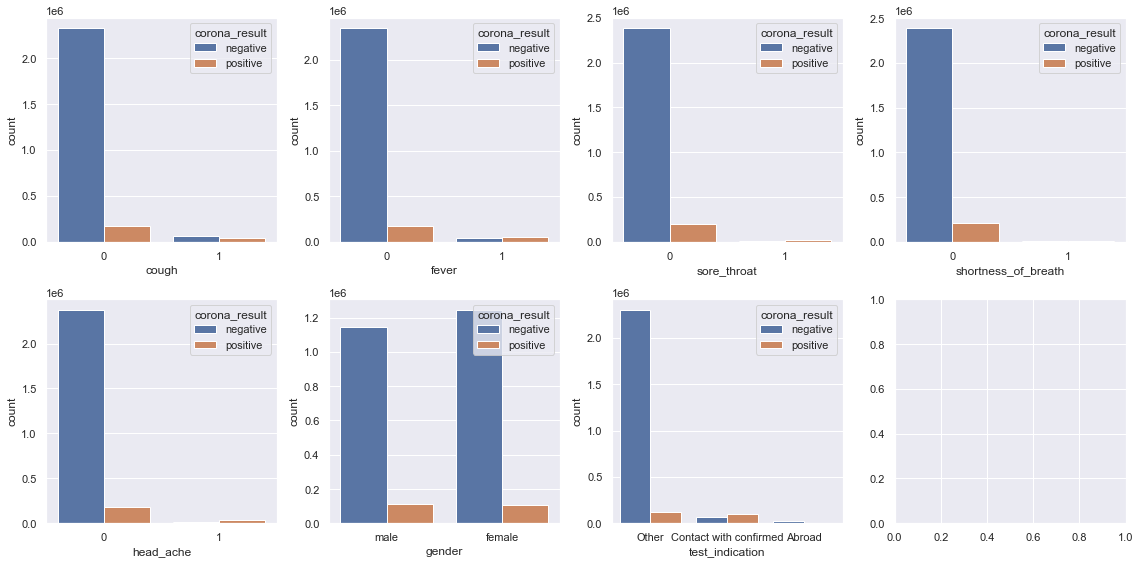

In [187]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots(2,4)
sns.countplot(x="cough", hue="corona_result", data=df, ax=ax[0,0])
sns.countplot(x="fever", hue="corona_result", data=df, ax=ax[0,1])
sns.countplot(x="sore_throat", hue="corona_result", data=df, ax=ax[0,2])
sns.countplot(x="shortness_of_breath", hue="corona_result", data=df, ax=ax[0,3])
sns.countplot(x="head_ache", hue="corona_result", data=df, ax=ax[1,0])
#sns.countplot(x="age_60_and_above", hue="corona_result", data=df, ax=ax[1,1])
sns.countplot(x="gender", hue="corona_result", data=df, ax=ax[1,1])
sns.countplot(x="test_indication", hue="corona_result", data=df, ax=ax[1,2])
plt.tight_layout()

### Converting Number Value to Categorical Values

In [188]:
pd.options.mode.chained_assignment = None
df['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)
#df['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['gender'].replace(['male', 'female'], [1, 0], inplace=True)
df['test_indication'].replace(['Other', 'Contact with confirmed', 'Abroad'], [0, 1, 2], inplace=True)

df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,1


### Visualizing Corelation with Heatmap

In [189]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

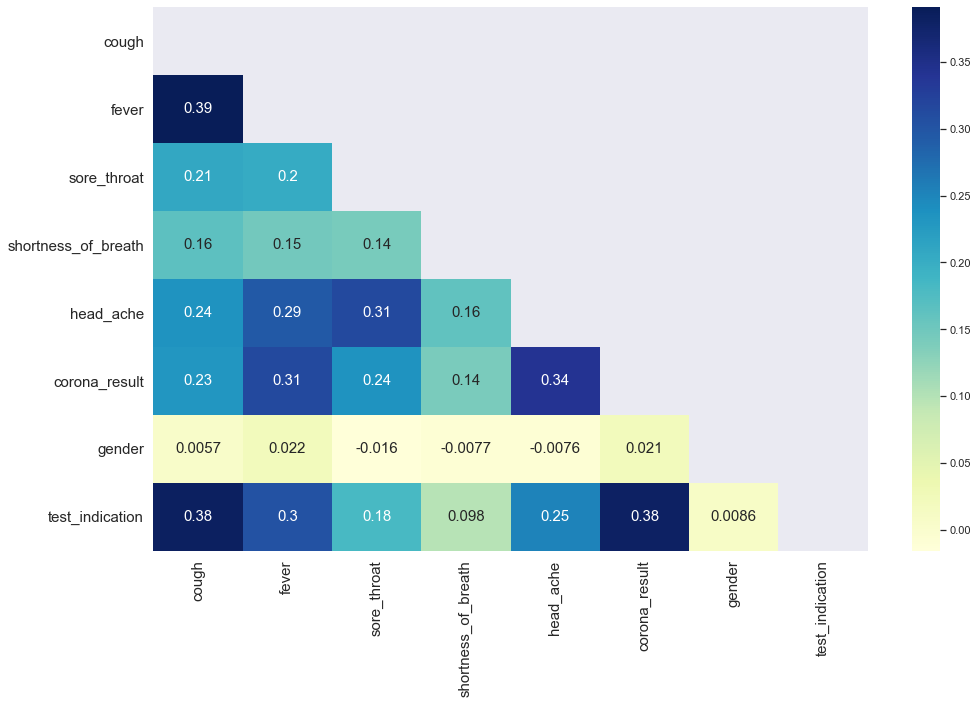

In [190]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True, mask=mask, annot_kws={"size": 15}, cmap="YlGnBu")

plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)

plt.show()

## Training the Model

### Test Train Split

In [191]:
X = df.drop('corona_result',axis=1)
y = df['corona_result']

#### Counting the Number of Positive and Negative

In [192]:
print('Dataset shape %s' % Counter(y))

Dataset shape Counter({0: 2390508, 1: 219681})


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
X_train.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,test_indication
2174942,0,0,0,0,0,1,0
410332,0,0,0,0,0,1,1
765505,0,0,0,0,0,0,0
1451380,1,0,1,0,0,0,1
685647,0,0,0,0,0,1,0


### Fitting the Model

In [194]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Predicting the Values

In [195]:
predictions = model.predict(X_test)

In [196]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
2068816,0,0
332043,0,0
658896,0,0
582799,0,0
1237632,0,0
...,...,...
1782208,1,0
1064244,1,0
2602740,0,1
2598649,0,0


### Accuracy of the Model

In [197]:
model.score(X_test, y_test)

0.9142132073042902

### Dumping into a pickle file

In [198]:
filename = 'NaiveBayes_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Evaluation Metrics

### Classification Report

In [199]:
classification_report(y_test, predictions, target_names=['Negative', 'Positive'])

'              precision    recall  f1-score   support\n\n    Negative       0.95      0.96      0.95    597533\n    Positive       0.49      0.44      0.46     55015\n\n    accuracy                           0.91    652548\n   macro avg       0.72      0.70      0.71    652548\nweighted avg       0.91      0.91      0.91    652548\n'

### Confusion Matrix

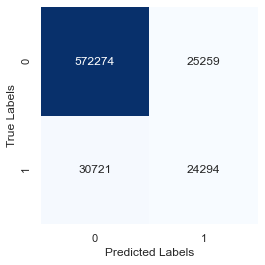

In [200]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

#### Mean Squared Error

In [201]:
mean_squared_error(y_test, predictions)

0.08578679269570974

#### Mean Absolute Error

In [202]:
mean_absolute_error(y_test, predictions)

0.08578679269570974

#### R2 Score

In [203]:
r2_score(y_test, predictions)

-0.11122587304971909